# Prvá fáza projektu IAU
## Nemšovský, Hradský
### Analýza dát 020
#### Percentuálny podiel práce: Nemšovsný 50%, Hradský 50%

Pre začiatok je potrebné importovať potrebné knižnice

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats

Následne môžeme načítavať oba súbory a pozrieť sa na ich obsah

In [2]:
filename = "020/profiles.csv"
profiles = pd.read_csv(filename, sep='\t', index_col=0)
profiles.head()

,sex,job,blood_group,name,race,address,birthdate,current_location,ssn
0,M,Secretary/administrator,O+,Colton Garcia,Hawaiian,"222 Smith Shoals\nOrtegaland, NM 25312",1990-04-02,"(Decimal('81.068645'), Decimal('-61.887841'))",224-40-1972
1,M,Hydrogeologist,AB+,James Gray,Hawaiian,"755 Graham Lake\nValdezfurt, IN 21739","03/25/1926, 00:00:00","(Decimal('-5.4110755'), Decimal('-172.109419'))",351-11-1730
2,M,Tourism officer,AB-,Franklin Moore,White,"42832 Patrick Island\nEast Bradton, DE 36334","05/06/1958, 00:00:00","(Decimal('-88.540956'), Decimal('-94.396339'))",824-41-6795
3,F,Social worker,A+,Jennifer Anderson,White,Unit 8158 Box 0225\nDPO AP 69059,1908-06-07,"(Decimal('85.9643255'), Decimal('-165.105180'))",077-59-6064
4,F,Naval architect,A+,Carrie Wilson,Black,"0994 Daniel Park Apt. 137\nWest Melinda, KS 34770",13 Jan 1974,"(Decimal('-27.169289'), Decimal('96.479444'))",004-15-9553


In [3]:
filename2 = "020/labor.csv"
labor = pd.read_csv(filename2, sep='\t', index_col=0)
labor.head()

,er-cv,name,indicator,leukocyty,weight,ssn,relationship,etytr,smoker,erytrocyty,trombocyty,hemoglobin,ast,alp,alt,hematokrit,hbver
0,43.09887,Devin Diaz,1.0,4.47526,65.57593,597-97-9078,single,5.96219,no,6.20665,5.71427,5.06667,57.92930,57.60257,5.12934,7.11081,6.32708
1,32.51734,Theodore Morris,1.0,4.41339,58.47779,100-19-5038,divoced,5.44840,no,5.58217,6.29619,6.90945,61.47846,83.38342,10.59365,8.52324,9.06429
2,54.39106,Ashley Mccormick,1.0,4.71119,37.58396,241-30-2551,widowed,6.75478,Y,6.36030,6.67129,4.08668,59.37033,31.60935,10.72644,8.41874,7.11435
3,45.79943,Brent Howard,1.0,5.38079,88.06628,667-52-4116,married,6.33099,no,5.45784,6.24957,5.57164,50.31551,75.29715,9.26557,4.69702,7.00724
4,48.81261,Paul Jordan,0.0,4.72469,44.59816,368-59-5827,divoced,6.62153,no,6.36262,6.44608,6.49617,50.44424,84.90135,9.31196,6.31221,8.54503


# Základný opis dát a ich charakteristika

## Analýza dát framu profiles

In [4]:
profiles.shape

(3112, 9)

Profiles obsahuje 3112 záznamov s 9 atribútami

In [5]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3112 entries, 0 to 3111
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   sex               3112 non-null   object
 1   job               3112 non-null   object
 2   blood_group       3112 non-null   object
 3   name              3112 non-null   object
 4   race              3112 non-null   object
 5   address           3112 non-null   object
 6   birthdate         3112 non-null   object
 7   current_location  3112 non-null   object
 8   ssn               3112 non-null   object
dtypes: object(9)
memory usage: 243.1+ KB


## Popis stĺpcov
- sex -> pohlavie (M/F)
- job -> profesia
- blood_group -> krvná skupina
- name -> meno pacienta
- race -> rasa 
- address -> adresa pacienta
- birthdate -> dátum narodenia
- current_location -> momentálna lokácia (súradnice -> tuple)
- ssn -> Social Secure Number (Niečo ako číslo občianského)

In [6]:
profiles.blood_group.unique()

array(['O+', 'AB+', 'AB-', 'A+', 'B-', 'O-', 'B+', 'A-'], dtype=object)

Podľa očakávaní obsahuje len hodnoty krvných skupín (0+, 0-, AB+, AB-, A+, A-, B+, B-)

<AxesSubplot:xlabel='blood_group', ylabel='Count'>

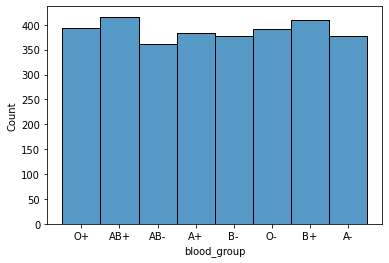

In [7]:
sns.histplot(data = profiles.blood_group)

Na grafe môžme vidieť počty ľudí pre každú krvnú skupinu

In [8]:
profiles.race.unique()

array(['Hawaiian', 'White', 'Black', 'Asian', 'Indian', 'black', 'blsck',
       'white'], dtype=object)

Okrem očakávaných hodnôt (Hawaiian, White, Black, Asian, Indian) sa tu nachádzajú aj hodnoty s chybným zápisom (black, blsck, white)ktorých sa neskôr zbavíme.

## Analýza dát framu labor

In [9]:
labor.shape

(9987, 17)

Labor obsahuje 9987 záznamov so 17 atribútami

In [10]:
labor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9987 entries, 0 to 9986
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   er-cv         9957 non-null   float64
 1   name          9987 non-null   object 
 2   indicator     9987 non-null   float64
 3   leukocyty     9957 non-null   float64
 4   weight        9987 non-null   float64
 5   ssn           9987 non-null   object 
 6   relationship  9987 non-null   object 
 7   etytr         9957 non-null   float64
 8   smoker        9987 non-null   object 
 9   erytrocyty    9957 non-null   float64
 10  trombocyty    9957 non-null   float64
 11  hemoglobin    9957 non-null   float64
 12  ast           9957 non-null   float64
 13  alp           9956 non-null   float64
 14  alt           9957 non-null   float64
 15  hematokrit    9957 non-null   float64
 16  hbver         9956 non-null   float64
dtypes: float64(13), object(4)
memory usage: 1.4+ MB


## Popis stĺpcov
- er-cv -> ?estimated red cell volume?
- name -> meno pacienta
- indicator -> bool (0, 1), indikátor či má človek leukémiu
- leukocyty -> biele krvinky
- weight -> váha pacienta
- ssn -> Social Secure Number (Niečo ako číslo občianského)
- relationship -> rodinný stav (single, divorced, widowed, married, separated, nop - bude asi nieco co nepatri ani medzi jedno idk)
- etytr -> ?netusim?
- smoker -> fajčiar
- erytrocity -> červené krvinky
- trombocyty -> krvné doštičky
- hemoglobin -> červené farbivo v krvi
- ast -> Aspartátaminotransferáza (pečeňové enzýmy)
- alp -> Alkalická fosfatáza (pečeňové enzýmy)
- alt -> Alaninaminotransferáza (pečeňové enzýmy)
- hematokrit -> pomer medzi objemom bunkovej časti krvi (teda najmä erytrocytov) a objemom celej krvi.
- hbver -> ??

Číselne atribúty vieme jednocuho analizovať za pomoci describe

In [11]:
labor.describe()

,er-cv,indicator,leukocyty,weight,etytr,erytrocyty,trombocyty,hemoglobin,ast,alp,alt,hematokrit,hbver
count,9957.000000,9987.000000,9957.000000,9987.000000,9957.000000,9957.000000,9957.000000,9957.000000,9957.000000,9956.000000,9957.000000,9957.000000,9956.000000
mean,48.425748,0.643036,6.649040,69.606618,6.193915,6.236316,6.213423,5.421372,49.469559,55.509917,11.496663,6.633143,7.397443
std,13.726128,0.479128,1.566503,34.914156,0.997552,0.992777,0.980931,1.620002,13.796167,27.049256,5.958054,1.755006,1.149620
min,0.000000,0.000000,2.217920,-77.211600,2.278160,2.370300,2.243970,0.707220,0.000000,0.000000,0.000000,0.000000,2.330940
25%,39.104980,0.000000,5.197150,45.966525,5.522740,5.567770,5.560160,4.344490,40.141510,30.777518,8.202420,5.517100,6.677130
50%,48.429690,1.000000,6.602370,69.283390,6.179510,6.228810,6.211510,5.254600,49.560750,59.361045,10.461270,6.849510,7.392865
75%,57.726030,1.000000,7.861560,93.614410,6.868990,6.900100,6.877920,6.301200,58.766980,80.739665,13.165980,7.869410,8.118615
max,100.000000,1.000000,12.131510,211.399600,9.707420,9.859350,9.527610,13.310770,100.000000,100.000000,100.000000,12.580070,12.383660


Okrem základnej analýzy vidíme aj chybné údaje v kategórií weight, ktorá nemá dôvod obsahovať mínusové hodnoty

Pre analízu nečíselných vieme znova použit veci ako unique.

In [12]:
labor.smoker.unique()

array(['no', 'Y', 'N', 'yes'], dtype=object)

Smoker znova obsahuje duplicitne pomenovania ktoré budú neskôr odstránené.

In [13]:
labor.relationship.unique()

array(['single', 'divoced', 'widowed', 'married', 'separated', 'nop'],
      dtype=object)

## Grafové spracovanie zloženia krvy

<AxesSubplot:xlabel='leukocyty', ylabel='Count'>

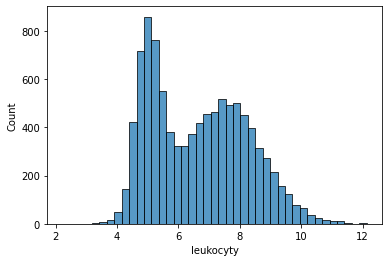

In [14]:
sns.histplot(data=labor.leukocyty)

Z grafu vieme prečítať, že najviac ľudí sa pri počte leukocitov pohybuje v oblasti od 4,5 do 5,5

<AxesSubplot:>

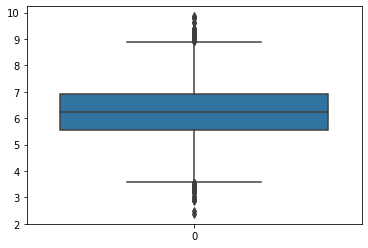

In [15]:
sns.boxplot(data=labor.erytrocyty)

<AxesSubplot:>

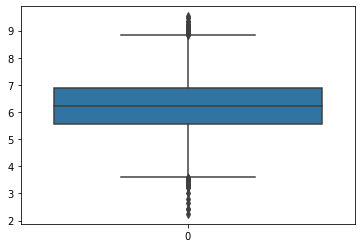

In [16]:
sns.boxplot(data=labor.trombocyty)

<AxesSubplot:>

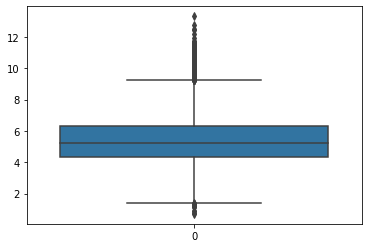

In [17]:
sns.boxplot(data=labor.hemoglobin)

Na všetkých grafoch vidíme, že väčšina údajov je tesne pri sebe 

## Grafové spracovanie pečeňových enzýmov

<AxesSubplot:xlabel='alp', ylabel='Count'>

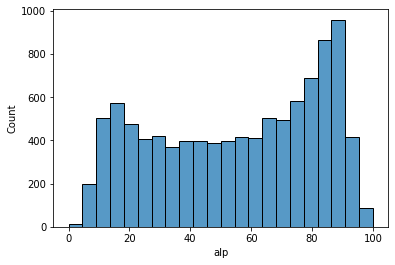

In [18]:
sns.histplot(data=labor.alp)

<AxesSubplot:>

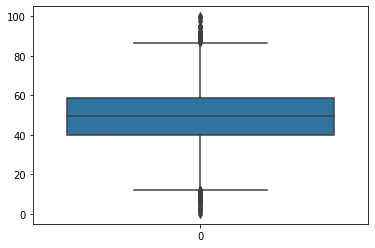

In [19]:
sns.boxplot(data=labor.ast)

<AxesSubplot:>

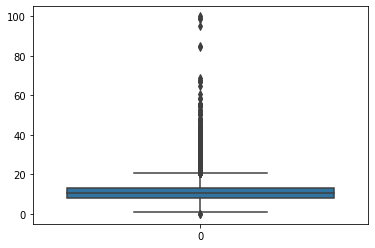

In [20]:
sns.boxplot(data=labor.alt)

Na grafoch vidíme že alp má vyrovnané pokrytie, a ast,alt majú údaje zoskupené

## Párová analýza dát
V 2 časti sa pozrieme na vsťahy a závislosti jednotlivých atribútov

<AxesSubplot:>

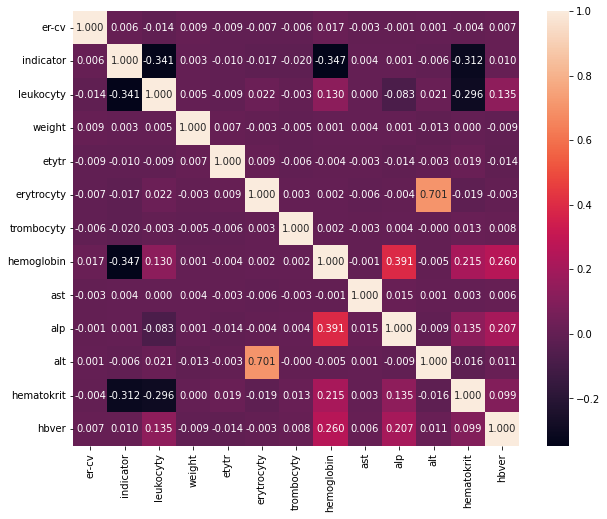

In [21]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(labor.corr(), ax=ax, annot=True, fmt=".3f")

Na heatmape korelácie vidíme, že väčšina atribútov žiadnu koreláciu (kladnú ani zápornú) nemá, ďalej sa budeme sústrediť iba na korelácie s hodnotou viac ako 0,3 resp menej ako -0,3

### Erytrocyty a alt, korelácia 0,7

<AxesSubplot:xlabel='alt', ylabel='erytrocyty'>

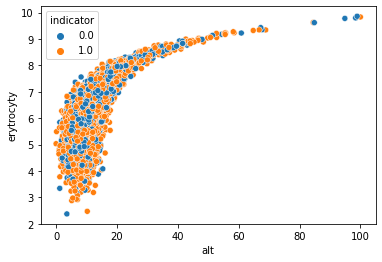

In [22]:
sns.scatterplot(
    data=labor,
    x=labor.alt,
    y=labor.erytrocyty,
    hue=labor.indicator
)

Ako vidíme na grafe, s vyšším počtom erytrocytov rastie aj množstvo alt, rast vyzerá logaritmicky

### Hemoglobin a alp, korelácia 0,4

<AxesSubplot:xlabel='hemoglobin', ylabel='alp'>

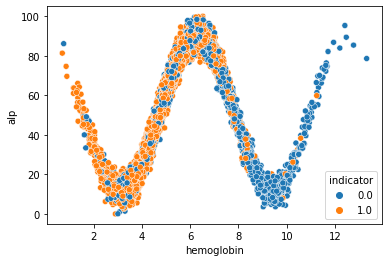

In [23]:
sns.scatterplot(
    data=labor,
    x=labor.hemoglobin,
    y=labor.alp,
    hue=labor.indicator
)

Graf naberá tvar dvojitej konvexnej kvadratickej funkcie s viditeľným rozdielom pre indikátor 1 a 0

## Porovnanie s indikátorom
### Leukocyty a indicator

<AxesSubplot:xlabel='leukocyty', ylabel='Density'>

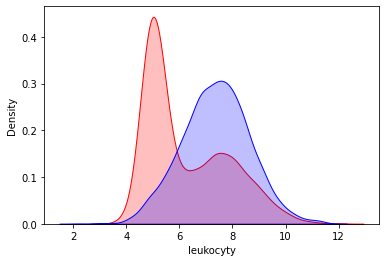

In [24]:
sns.kdeplot(labor.loc[(labor.indicator == 1), 'leukocyty'], color='r', shade=True)
sns.kdeplot(labor.loc[(labor.indicator == 0), 'leukocyty'], color='b', shade=True)

Vidíme že ľudia s leukémium majú väčšinou znížený počet leukocytov

### Hemoglobin a indicator

<AxesSubplot:xlabel='hemoglobin', ylabel='Density'>

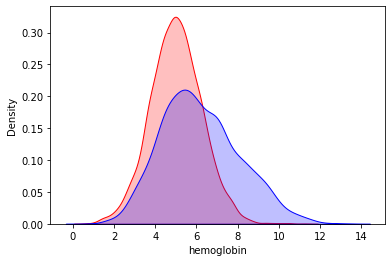

In [25]:
sns.kdeplot(labor.loc[(labor.indicator == 1), 'hemoglobin'], color='r', shade=True)
sns.kdeplot(labor.loc[(labor.indicator == 0), 'hemoglobin'], color='b', shade=True)

Na grafe je ukázané, že rozdiel medzi indikátorom 1 a 0 je extrémne malý, aj keď ľudia s leukémiou majú zvyčajne menšie množstvo hemoglobínu

### Hematokrit a indicator

<AxesSubplot:xlabel='hematokrit', ylabel='Density'>

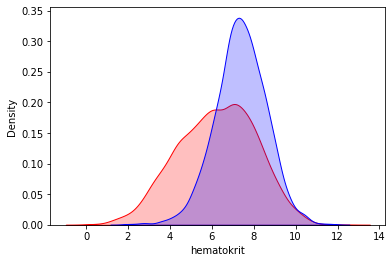

In [26]:
sns.kdeplot(labor.loc[(labor.indicator == 1), 'hematokrit'], color='r', shade=True)
sns.kdeplot(labor.loc[(labor.indicator == 0), 'hematokrit'], color='b', shade=True)

Pri hematokrite je ukázané, že ľudia s menším množstvom hematokritu majú zvýšenú šancu mať leukémiu
Zvyšné atribúty sme s indikátorom neporovnávali, lebo ich grafy pre indikátor 0 a 1 boli skoro totožné

# Vytvorenie a testovanie hypotéz
## Hypotéza 1

**H0 (nulová hypotéza)** Pacienti s indikátorom a bez indikátoru majú v priemere rovnakú hladinu leukocytov v krvi.

**HA (alternatívna hypotéza)** Pacienti s indikátorom, majú zníženú alebo zvýšenú hodnotu leukocytov oproti pacientom bez indikátora.

<AxesSubplot:xlabel='indicator', ylabel='leukocyty'>

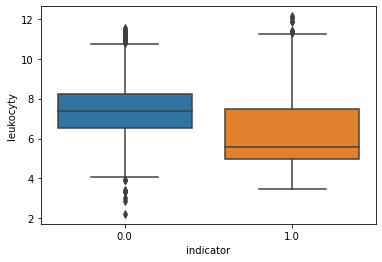

In [27]:
sns.boxplot(x='indicator', y='leukocyty', data=labor[(labor.indicator == 1) | (labor.indicator == 0)])

Na základe vizuálneho porovnania vidíme malý rozdiel, ďalej budeme testovať štatistickým testom

In [28]:
leuk0 = labor.loc[labor.indicator == 0, 'leukocyty']
leuk0.describe()

count    3557.000000
mean        7.364604
std         1.282445
min         2.217920
25%         6.508080
50%         7.390320
75%         8.218030
max        11.560270
Name: leukocyty, dtype: float64

<AxesSubplot:xlabel='leukocyty', ylabel='Count'>

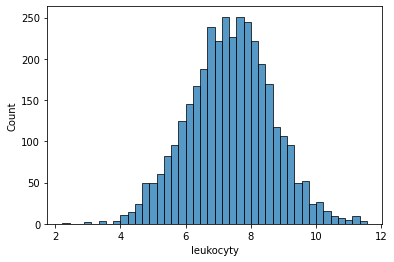

In [29]:
sns.histplot(leuk0)

Na identifikovanie a odstránenie outlierov vieme použiť funkciu z cvika ktorá odstráni hodnoty nachádzajúce sa viac ako 1,5 násobok medzikvartilového rozdelenia od horného, resp. dolného kvartilu

In [30]:
# funkcia z cvika
def identify_outliers(a):
    lower = a.quantile(0.25) - 1.5 * stats.iqr(a)
    upper = a.quantile(0.75) + 1.5 * stats.iqr(a)
    
    return a[(a > upper) | (a < lower)]

In [31]:
leuk0_out = identify_outliers(leuk0)
leuk0_out.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: leukocyty, dtype: float64

Pre indikátor 0 leukocyty outlierov nemajú

In [32]:
leuk1 = labor.loc[labor.indicator == 1, 'leukocyty']
leuk1.describe()

count    6400.000000
mean        6.251343
std         1.568830
min         3.469270
25%         4.978632
50%         5.595955
75%         7.496440
max        12.131510
Name: leukocyty, dtype: float64

<AxesSubplot:xlabel='leukocyty', ylabel='Count'>

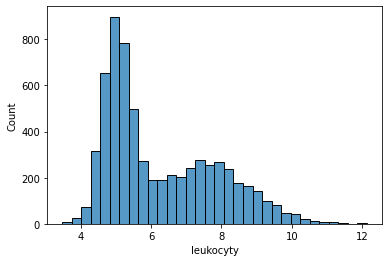

In [33]:
sns.histplot(leuk1)

In [34]:
leuk1_out = identify_outliers(leuk1)
leuk1_out.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: leukocyty, dtype: float64

Ako vidieť, naše dáta nemajú podľa danej funckie outlierov v ani jednom prípade

Ak je  𝑝<0,05 , nulovú hypotézu zamietame a dáta pravdepodobne pochádzajú z iného ako normálneho rozdelenia. Ak je  𝑝>0,05 , nulovú hypotézu nezamietame, teda na základe dát nemôžeme prehlásiť, že by dáta pochádzali z iného, ako normálneho rozdelenia.

In [35]:
stats.shapiro(leuk0.dropna())

ShapiroResult(statistic=0.999159038066864, pvalue=0.0891357958316803)

In [36]:
stats.shapiro(leuk1.dropna())

c:\users\patri\appdata\local\programs\python\python38\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9078372716903687, pvalue=0.0)

Na základe výsledkov testu sa zdá, že hodnota leukocytov u pacientov s indikátorom 0 pochádza z normálneho rozdelenia, hodnota leukocytov u pacientov s indikátorom 1 nie. Mali by sme teda použiť neparametrickú verziu t-testu, t. j. Mann-Whitneyho U-test

In [37]:
stats.mannwhitneyu(leuk0.dropna(), leuk1.dropna())

MannwhitneyuResult(statistic=16303437.0, pvalue=9.635222158342039e-281)

Keďže  𝑝<0,001 , pravdepodobnosť chyby 1. rádu (že nulová hypotéza je pravdivá a my ju zamietame) je menej ako 1 promile. Našu nulovú hypotézu H0 teda zamietame v prospech alternatívnej hypotézy. Hladina leukocytov teda má vpliv na indikátor

## Hypotéza 2

**H0 (nulová hypotéza)** Pacienti s indikátorom a bez indikátoru majú v priemere rovnakú hladinu hemoglobínu v krvi.

**HA (alternatívna hypotéza)** Pacienti s indikátorom, majú zníženú alebo zvýšenú hodnotu hemoglobínu oproti pacientom bez indikátora.

<AxesSubplot:xlabel='indicator', ylabel='hemoglobin'>

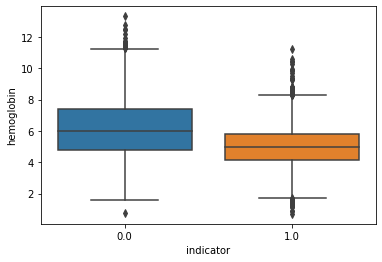

In [38]:
sns.boxplot(x='indicator', y='hemoglobin', data=labor[(labor.indicator == 1) | (labor.indicator == 0)])

Opäť na základe vizuálneho porovnania vidíme len malý rozdiel, a teda môžme pokračovať štatistickým testom

In [39]:
hem0 = labor.loc[labor.indicator == 0, 'hemoglobin']
hem0.describe()

count    3550.000000
mean        6.176784
std         1.901356
min         0.764630
25%         4.781598
50%         5.972885
75%         7.382855
max        13.310770
Name: hemoglobin, dtype: float64

<AxesSubplot:xlabel='hemoglobin', ylabel='Count'>

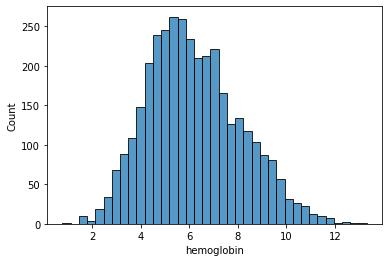

In [40]:
sns.histplot(hem0)

Znova sa pokusíme odstrániť outlierov

In [41]:
hem0_out = identify_outliers(hem0)
hem0_out.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: hemoglobin, dtype: float64

In [42]:
hem1 = labor.loc[labor.indicator == 1, 'hemoglobin']
hem1.describe()

count    6407.000000
mean        5.002812
std         1.258761
min         0.707220
25%         4.175045
50%         4.991130
75%         5.819950
max        11.242370
Name: hemoglobin, dtype: float64

In [43]:
hem1_out = identify_outliers(hem1)
hem1_out.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: hemoglobin, dtype: float64

Opäť sme žiadnych outlierov nenašli a teda môžme pokracovať ďalej

Ak je  𝑝<0,05 , nulovú hypotézu zamietame a dáta pravdepodobne pochádzajú z iného ako normálneho rozdelenia. Ak je  𝑝>0,05 , nulovú hypotézu nezamietame, teda na základe dát nemôžeme prehlásiť, že by dáta pochádzali z iného, ako normálneho rozdelenia.

In [44]:
stats.shapiro(hem0.dropna())

ShapiroResult(statistic=0.988235354423523, pvalue=1.3251166068325526e-16)

In [45]:
stats.shapiro(hem1.dropna())

c:\users\patri\appdata\local\programs\python\python38\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9978976845741272, pvalue=1.1064000915439465e-07)

Na základe výsledkov testu sa zdá, že hodnoty hemoglobinu u pacientov s indikátorom 0 aj hodtoty hemoglobinu u pacientov s indikátorom 1 nepochádzaju z normálneho rozdelenia.

In [46]:
stats.mannwhitneyu(hem0.dropna(), hem1.dropna())

MannwhitneyuResult(statistic=15543266.5, pvalue=1.914565365447489e-202)

Keďže  𝑝<0,001 , pravdepodobnosť chyby 1. rádu (že nulová hypotéza je pravdivá a my ju zamietame) je menej ako 1 promile. Našu nulovú hypotézu H0 teda zamietame v prospech alternatívnej hypotézy. Hladina hemoglobínu teda má vpliv na indikátor

# Identifikácia problémov a ich riešenie v dátach
## Zle zapísané hodnoty
Ako sme si pri analýze všimli, niektoré údaje sú zapísané s chybou, alebo iným spôsobom čo môže vytvárať problémy

In [47]:
labor['smoker'].value_counts()

no     5460
yes    2039
Y      1985
N       503
Name: smoker, dtype: int64

Ako vidieť smoker obsahuje yes,Y pre ano a N,no pre nie. Treba údaje upraviť tak, aby pre každú možnosť len jedna odpoveď
Najjednoduchšie sa oprava vykoná prepísaním všetkých chybných údajov na spravný zápis

In [48]:
labor.loc[labor['smoker'] == 'yes', 'smoker']='Y'

In [49]:
labor.loc[labor['smoker'] == 'no', 'smoker']='N'

In [50]:
labor['smoker'].value_counts()

N    5963
Y    4024
Name: smoker, dtype: int64

Nesprávne zapísané údaje boli opravené. Ďalej sa môžme pozrieť na rozdelenie rás

In [51]:
profiles['race'].value_counts()

White       1547
Black        774
Asian        303
Hawaiian     157
Indian       157
black        106
white         41
blsck         27
Name: race, dtype: int64

Rasa má podobný problém ako smoker. Obsahuje zle zapísané údaje ktoré musíme prepísať aby nám neprekážali.

In [52]:
profiles.loc[profiles['race'] == 'black','race']='Black'

In [53]:
profiles.loc[profiles['race'] == 'blsck','race']='Black'

In [54]:
profiles.loc[profiles['race'] == 'white','race']='White'

In [55]:
profiles['race'].value_counts()

White       1588
Black        907
Asian        303
Hawaiian     157
Indian       157
Name: race, dtype: int64

Problém bol prepísaný a vyriešený

## Nezmyselné hodnoty
Mínusové hodnoty nemajú čo robiť vo váhe človeka

In [56]:
len (labor[(labor[['er-cv','leukocyty','weight','etytr','erytrocyty',
       'trombocyty','hemoglobin','ast','alp','alt','hematokrit','hbver']] < 0).any(1)])

212

In [57]:
labor['weight']=labor['weight'].apply(abs)

In [58]:
len (labor[(labor[['er-cv','leukocyty','weight','etytr','erytrocyty',
       'trombocyty','hemoglobin','ast','alp','alt','hematokrit','hbver']] < 0).any(1)])

0

Reálne sme došli na to, že mínusové hodnoty sa nachádzali len v stĺpci weight, pričom sme všetky nahradili absolútnou hodnotou.

## Duplicated values

In [59]:
temp = profiles.groupby(profiles.columns.tolist(),as_index=False).size().sort_values(by='size',ascending=False)
len(temp[temp['size']!=1].index)

0

Profiles neobsahuje žiadne duplicitné dáta.

In [60]:
temp = labor.groupby(labor.columns.tolist(),as_index=False).size().sort_values(by='size',ascending=False)
len(temp[temp['size']!=1].index)

97

In [61]:
temp[temp['size']!=1]

,er-cv,name,indicator,leukocyty,weight,ssn,relationship,etytr,smoker,erytrocyty,trombocyty,hemoglobin,ast,alp,alt,hematokrit,hbver,size
1953,36.85868,Amanda Moss,1.0,8.94093,53.47741,455-59-6646,divoced,6.70009,Y,7.33284,5.85793,4.02412,44.02578,28.88274,17.20712,4.91373,7.87466,2
4398,47.01661,Jacob Bishop,0.0,6.05982,118.44690,555-02-6981,married,6.02724,Y,6.42045,5.21061,6.66009,43.35862,87.20025,11.80901,6.37185,6.51172,2
4933,49.10089,Lucas Daniels,1.0,4.78625,89.25974,761-66-3906,nop,6.58455,N,5.14855,6.02627,4.90211,53.16771,63.01883,9.97897,7.17233,8.15767,2
8115,62.58563,Angelica Saunders,1.0,5.11267,40.14486,074-27-6859,married,5.84453,N,8.22343,5.44669,4.23809,33.16196,30.83199,25.61411,4.17078,5.01484,2
432,25.02735,Samantha Kline,1.0,4.83626,93.92848,448-40-8702,married,6.81760,N,5.42708,6.88658,3.60870,41.31060,16.17809,6.59240,8.54529,6.14831,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,23.55154,Madison Turner,1.0,7.92236,120.43574,129-08-7990,divoced,6.95033,N,7.07892,5.87334,4.20848,48.32313,36.66648,12.06224,4.86045,7.55401,2
9498,82.59611,Michael Barber,1.0,4.96495,19.54388,650-66-2708,married,4.17278,N,6.65761,6.55372,6.03742,32.33309,87.69255,11.63715,7.63351,9.08369,2
5740,52.01583,Nicole Fisher,1.0,8.95590,26.41556,533-72-4015,single,7.21447,N,6.44991,7.04598,3.71627,36.21511,16.67718,10.85988,5.74309,6.94124,2
7528,59.42285,Mark Harris,1.0,8.16425,42.36423,358-47-5504,married,5.91980,N,4.53852,5.87536,3.75428,49.42290,26.15634,7.83338,4.77698,7.36499,2


Labor obsahuje 97 duplicitných záznamov ktoré môžme odstrániť

In [62]:
labor = labor.drop_duplicates()

In [63]:
temp = labor.groupby(labor.columns.tolist(),as_index=False).size().sort_values(by='size',ascending=False)
len(temp[temp['size']!=1].index)

0

Všetky duplicitné záznami boli odstránené

In [64]:
labor = labor.reset_index(drop = True)

## Missing values

Taktiež je v dátach potrebné nahradiť chýbajúce dáta

Vyskusali sme 2 metody:
- drop_na -> vymaze vsetky riadky s nan hodnotou
- my_fill_na -> vyplni nan hodnoty priemerom daneho atributu (zvlast pre indikator 0 a 1)

vybrali sme metodu my_fill_na

In [65]:
labor.isna().any(axis=1).sum()

327

In [66]:
def drop_na(df):
    return df.copy().dropna()

In [67]:
# Funkcia berie ako vstupné parametre upravovaný atribút a hodnotu indikátoru
# Následne nahradí všetky NA údaje v atribúte za priemer
# Funkcia nahrádza chýbajúce hodnoty s indikátorom 0 za priemer hodnôt s indikátorom 0
# A chýbajúce hodnoty s indikátorom 1 za priemer hodnôt s indikátorom 1
def my_fill_na(arg1,ind):
    labor.loc[labor['indicator'] == ind , arg1] = labor.loc[labor['indicator'] == ind , arg1].fillna(
    (labor.loc[labor['indicator'] == ind , arg1].mean()))
    
def use_my_fill_na(atributes):
    for atribute in atributes:
        my_fill_na(atribute, 0)
        my_fill_na(atribute, 1)

In [68]:
# Spúšťam funkciu pre všetky stĺpce s chýbajúcimi hodnotami pre indikátor 0 aj 1
# my_fill_na('er-cv',0)
# my_fill_na('er-cv',1)
# my_fill_na('leukocyty',0)
# my_fill_na('leukocyty',1)
# my_fill_na('etytr',0)
# my_fill_na('etytr',1)
# my_fill_na('erytrocyty',0)
# my_fill_na('erytrocyty',1)
# my_fill_na('trombocyty',0)
# my_fill_na('trombocyty',1)
# my_fill_na('hemoglobin',0)
# my_fill_na('hemoglobin',1)
# my_fill_na('ast',0)
# my_fill_na('ast',1)
# my_fill_na('alt',0)
# my_fill_na('alt',1)
# my_fill_na('alp',0)
# my_fill_na('alp',1)
# my_fill_na('hematokrit',0)
# my_fill_na('hematokrit',1)
# my_fill_na('hbver',0)
# my_fill_na('hbver',1)

use_my_fill_na(['er-cv', 'leukocyty', 'etytr', 'erytrocyty', 'trombocyty', 'hemoglobin', 'ast', 'alt', 'alp', 'hematokrit', 'hbver'])

In [69]:
labor.isna().any(axis=1).sum()

0

Všetky chýbajúce hodnoty boli nahradené priemernými údajmi

In [70]:
profiles.isna().any(axis=1).sum()

0

Profiles neobsahuje žiadne chýbajúce dáta

## Integrácia a čistenie
### Prepis dát na numerické

Z nenumerických atribútov je smoker jediný ktorý by mohol mať dopad na indikátor, teda ten prepíšeme

In [71]:
labor['smoker'].value_counts()

N    5892
Y    3996
Name: smoker, dtype: int64

In [72]:
labor.loc[labor['smoker'] == 'Y', 'smoker']=1
labor.loc[labor['smoker'] == 'N', 'smoker']=0

In [73]:
labor['smoker'].value_counts()

0    5892
1    3996
Name: smoker, dtype: int64

In [74]:
labor['smoker'] = labor['smoker'].astype(float, errors = 'raise')

Zvyšné nenumerické stĺpce môžu byť odstránené

In [75]:
labor=labor.drop(['name','relationship','ssn'],axis=1)
labor

,er-cv,indicator,leukocyty,weight,etytr,smoker,erytrocyty,trombocyty,hemoglobin,ast,alp,alt,hematokrit,hbver
0,43.09887,1.0,4.47526,65.57593,5.96219,0.0,6.20665,5.71427,5.06667,57.92930,57.60257,5.12934,7.11081,6.32708
1,32.51734,1.0,4.41339,58.47779,5.44840,0.0,5.58217,6.29619,6.90945,61.47846,83.38342,10.59365,8.52324,9.06429
2,54.39106,1.0,4.71119,37.58396,6.75478,1.0,6.36030,6.67129,4.08668,59.37033,31.60935,10.72644,8.41874,7.11435
3,45.79943,1.0,5.38079,88.06628,6.33099,0.0,5.45784,6.24957,5.57164,50.31551,75.29715,9.26557,4.69702,7.00724
4,48.81261,0.0,4.72469,44.59816,6.62153,0.0,6.36262,6.44608,6.49617,50.44424,84.90135,9.31196,6.31221,8.54503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9883,57.11218,1.0,5.26323,51.27708,5.00976,0.0,4.91856,6.48513,3.03796,41.27456,13.47601,13.88191,5.86663,6.55392
9884,55.86133,0.0,8.38651,152.99318,9.27774,0.0,5.78542,4.73446,4.92447,44.92183,56.03309,8.23807,6.50680,7.18183
9885,20.08620,1.0,4.81549,89.14354,6.54037,0.0,5.12928,5.28566,7.07261,20.39526,75.88338,7.06386,5.16492,8.92604
9886,40.47220,1.0,5.28603,18.62037,6.22798,0.0,6.35608,6.37370,5.59105,18.04463,79.92407,12.06706,5.72674,8.84950


### Outlier detection

2 použité metódy:
- drop outliers -> vymaže všetky riadky ktoré obsahujú oulierov
- fill outliers -> prepíše hodnoty outlierov na náhodnu hodnotu z horných resp. dolných 10% (bez outlierov)

In [76]:
import random
def detect_outlier(atr):
    lower = atr.quantile(0.25) - 1.5
    upper = atr.quantile(0.75) + 1.5
    
    return atr[(atr > upper) | (atr < lower)]

def detect_upper_lower_outliers(atr):
    lower = atr.quantile(0.25) - 1.5
    upper = atr.quantile(0.75) + 1.5
    
    return atr[(atr > upper)], atr[(atr < lower)]

# Tato funkcia najde vrchnych a spodnych outlierov a vyplni ich nahodnou hodnotou medzi minimom bez outlierov a 10 spodnych % pripadne maximom bez outlierov a 10 vrchnych %
def fill_outliers(df, atr):
    df.loc[detect_upper_lower_outliers(df[atr])[0].index, [atr]] = random.uniform(df.drop(detect_upper_lower_outliers(df[atr])[0].index)[atr].quantile(0.90), df.drop(detect_upper_lower_outliers(df[atr])[0].index)[atr].max())
    df.loc[detect_upper_lower_outliers(df[atr])[1].index, [atr]] = random.uniform(df.drop(detect_upper_lower_outliers(df[atr])[1].index)[atr].min(), df.drop(detect_upper_lower_outliers(df[atr])[1].index)[atr].quantile(0.10))
    df[atr]
    
def handle_outlier(df, atributes, handle_type='fill'):
    result = df.copy()
    if handle_type == 'fill':
        for atribute in atributes:
            fill_outliers(result, atribute)
    elif handle_type == 'drop':
        for atribute in atributes:
            result.drop(detect_outlier(result[atribute]).index, inplace=True)
    else:
        print("incorrect handle_type")
    return result

In [77]:
fill_labor = handle_outlier(labor, labor.columns, 'fill')
drop_labor = handle_outlier(labor, labor.columns, 'drop')

In [78]:
fill_labor

,er-cv,indicator,leukocyty,weight,etytr,smoker,erytrocyty,trombocyty,hemoglobin,ast,alp,alt,hematokrit,hbver
0,43.098870,1.0,4.47526,65.575930,5.962190,0.0,6.20665,5.71427,5.06667,57.929300,57.602570,7.510313,7.11081,6.32708
1,40.800992,1.0,4.41339,58.477790,5.448400,0.0,5.58217,6.29619,6.90945,59.758778,79.106192,10.593650,8.52324,9.06429
2,54.391060,1.0,4.71119,47.014512,6.754780,1.0,6.36030,6.67129,4.08668,59.370330,31.609350,10.726440,8.41874,7.11435
3,45.799430,1.0,5.38079,88.066280,6.330990,0.0,5.45784,6.24957,5.57164,50.315510,75.297150,9.265570,4.69702,7.00724
4,48.812610,0.0,4.72469,44.598160,6.621530,0.0,6.36262,6.44608,6.49617,50.444240,79.106192,9.311960,6.31221,8.54503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9883,57.112180,1.0,5.26323,51.277080,5.009760,0.0,4.91856,6.48513,3.03796,41.274560,30.531954,13.881910,5.86663,6.55392
9884,55.861330,0.0,8.38651,93.736960,7.526517,0.0,5.78542,4.73446,4.92447,44.921830,56.033090,8.238070,6.50680,7.18183
9885,40.800992,1.0,4.81549,89.143540,6.540370,0.0,5.12928,5.28566,7.07261,38.737082,75.883380,7.063860,5.16492,8.92604
9886,40.472200,1.0,5.28603,47.014512,6.227980,0.0,6.35608,6.37370,5.59105,38.737082,79.924070,12.067060,5.72674,8.84950


In [79]:
drop_labor

,er-cv,indicator,leukocyty,weight,etytr,smoker,erytrocyty,trombocyty,hemoglobin,ast,alp,alt,hematokrit,hbver
3,45.79943,1.0,5.38079,88.06628,6.33099,0.0,5.45784,6.24957,5.57164,50.31551,75.29715,9.26557,4.69702,7.00724
9,44.97858,0.0,8.69583,81.37918,4.84903,0.0,4.97382,6.65963,5.12654,42.11790,68.35640,12.36691,6.48790,5.42826
13,45.90824,1.0,5.34524,49.41696,4.46119,0.0,4.71704,6.12707,4.75162,54.71310,59.17991,6.99463,4.75046,6.31095
14,58.93732,1.0,5.19537,89.61914,6.07468,0.0,6.48464,4.82813,4.31620,51.02476,35.11703,9.82264,8.26802,8.48115
58,41.18274,1.0,6.13113,79.00431,5.40349,0.0,6.95126,5.59378,5.46566,41.46585,79.07919,13.58269,4.69549,6.98272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9718,50.45523,1.0,8.27761,79.01011,5.43564,1.0,5.11021,6.76488,4.41210,58.46080,34.60727,8.36119,4.32502,7.42513
9747,48.68953,1.0,9.34029,88.40117,6.35719,0.0,6.74175,5.07266,4.44718,57.33270,37.94382,11.24163,6.90049,7.29809
9780,45.16792,1.0,7.59033,53.47198,5.38901,1.0,6.08656,6.36043,5.34227,50.11715,75.40637,11.44836,4.13228,8.72397
9797,37.67508,1.0,4.96242,62.83305,6.90270,1.0,6.72200,4.17517,7.19763,49.73737,75.40351,12.21622,7.06372,9.35406


Necháme si dáta vytvorené metódou fill outlier, keďže po použití drop outlier by nám zostalo iba 400 záznamov

In [80]:
labor = fill_labor

### Presun hlavného atribútu do prvého stĺpca

In [81]:
indic = labor['indicator']
labor.drop(labels=['indicator'], axis=1,inplace = True)
labor.insert(0,'indicator',indic)
labor

,indicator,er-cv,leukocyty,weight,etytr,smoker,erytrocyty,trombocyty,hemoglobin,ast,alp,alt,hematokrit,hbver
0,1.0,43.098870,4.47526,65.575930,5.962190,0.0,6.20665,5.71427,5.06667,57.929300,57.602570,7.510313,7.11081,6.32708
1,1.0,40.800992,4.41339,58.477790,5.448400,0.0,5.58217,6.29619,6.90945,59.758778,79.106192,10.593650,8.52324,9.06429
2,1.0,54.391060,4.71119,47.014512,6.754780,1.0,6.36030,6.67129,4.08668,59.370330,31.609350,10.726440,8.41874,7.11435
3,1.0,45.799430,5.38079,88.066280,6.330990,0.0,5.45784,6.24957,5.57164,50.315510,75.297150,9.265570,4.69702,7.00724
4,0.0,48.812610,4.72469,44.598160,6.621530,0.0,6.36262,6.44608,6.49617,50.444240,79.106192,9.311960,6.31221,8.54503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9883,1.0,57.112180,5.26323,51.277080,5.009760,0.0,4.91856,6.48513,3.03796,41.274560,30.531954,13.881910,5.86663,6.55392
9884,0.0,55.861330,8.38651,93.736960,7.526517,0.0,5.78542,4.73446,4.92447,44.921830,56.033090,8.238070,6.50680,7.18183
9885,1.0,40.800992,4.81549,89.143540,6.540370,0.0,5.12928,5.28566,7.07261,38.737082,75.883380,7.063860,5.16492,8.92604
9886,1.0,40.472200,5.28603,47.014512,6.227980,0.0,6.35608,6.37370,5.59105,38.737082,79.924070,12.067060,5.72674,8.84950


## Predspracovanie
### Rozdelenie dát na skupiny

Najprv sú všetky dáta rozdelené na 2 skupiny pomerom určeným premennou split_by

In [82]:
split_by = 0.75

In [83]:
labor_train = labor.sample(frac=split_by,random_state=200)
labor_train.sort_index()

,indicator,er-cv,leukocyty,weight,etytr,smoker,erytrocyty,trombocyty,hemoglobin,ast,alp,alt,hematokrit,hbver
0,1.0,43.098870,4.47526,65.575930,5.962190,0.0,6.20665,5.71427,5.066670,57.929300,57.602570,7.510313,7.110810,6.32708
1,1.0,40.800992,4.41339,58.477790,5.448400,0.0,5.58217,6.29619,6.909450,59.758778,79.106192,10.593650,8.523240,9.06429
4,0.0,48.812610,4.72469,44.598160,6.621530,0.0,6.36262,6.44608,6.496170,50.444240,79.106192,9.311960,6.312210,8.54503
6,1.0,40.092490,5.59888,47.014512,4.866210,0.0,5.85262,6.27295,4.973570,38.737082,65.622940,6.723220,4.485617,6.62205
7,1.0,58.864220,5.61325,47.014512,7.608290,0.0,5.30479,4.90232,4.268420,38.991060,30.531954,8.147130,7.835700,8.92026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9882,0.0,49.994860,7.85081,93.736960,7.732690,0.0,5.53732,6.03182,6.963356,56.957640,43.228260,7.510313,7.994760,7.46853
9883,1.0,57.112180,5.26323,51.277080,5.009760,0.0,4.91856,6.48513,3.037960,41.274560,30.531954,13.881910,5.866630,6.55392
9884,0.0,55.861330,8.38651,93.736960,7.526517,0.0,5.78542,4.73446,4.924470,44.921830,56.033090,8.238070,6.506800,7.18183
9886,1.0,40.472200,5.28603,47.014512,6.227980,0.0,6.35608,6.37370,5.591050,38.737082,79.924070,12.067060,5.726740,8.84950


Následne je potrebné odstrániť všetky prvky trénovacej množiny z množiny testovacej, nech sa netestuje a neučí na rovnakých dátach

In [84]:
labor_test = labor
labor_test = pd.merge(labor_test,labor_train,indicator = True, how = 'outer').query('_merge=="left_only"').drop('_merge', axis = 1)
labor_test

,indicator,er-cv,leukocyty,weight,etytr,smoker,erytrocyty,trombocyty,hemoglobin,ast,alp,alt,hematokrit,hbver
2,1.0,54.391060,4.71119,47.014512,6.75478,1.0,6.36030,6.67129,4.086680,59.370330,31.609350,10.726440,8.41874,7.11435
3,1.0,45.799430,5.38079,88.066280,6.33099,0.0,5.45784,6.24957,5.571640,50.315510,75.297150,9.265570,4.69702,7.00724
5,0.0,57.371800,8.94992,47.014512,7.64333,0.0,8.02422,7.05623,6.963356,59.758778,30.531954,13.692930,6.09792,8.63421
17,0.0,40.800992,6.55826,47.014512,4.11510,0.0,7.53348,7.17969,4.560880,38.737082,52.076020,13.692930,8.29881,6.96526
18,0.0,42.352340,7.09271,93.736960,6.75541,0.0,6.30560,5.92762,5.324640,48.127800,74.442070,11.632250,7.84449,6.40476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9857,0.0,51.924730,7.42250,47.014512,5.65971,0.0,6.04362,5.55945,5.318330,49.041060,74.738330,10.979960,7.09665,8.86807
9860,0.0,40.800992,5.55312,93.736960,5.30070,1.0,4.72099,6.15914,5.119560,40.290270,72.011010,7.510313,6.09715,5.23831
9861,1.0,56.020080,5.28786,93.736960,7.36943,0.0,7.01076,5.13054,4.958360,43.738310,60.217490,14.364240,7.25766,8.54782
9876,0.0,40.800992,8.81097,87.745530,6.49795,1.0,7.04396,6.27611,5.566250,48.248710,81.189150,13.743320,6.14338,6.29473


### Transformácia atribútov

Pre transformáciu atribútov sme vyskúšali viacero metód (scaling aj transforming)

použité metódy:
- MinMaxScaler
- StandartScaler
- RobustScaler
- PowerTransformer (yeo-johnson)
- QuantileTransformer

Nakoniec sme si nechali metódu Quantile Transformer ktorá transformuje všetky hodnoty do množiny od 0 po 1. Túto metódu sme vybrali preto, že výsledné dáta sa zdajú byť najrovnomernejšie rozložené.

In [85]:
atributes = labor_train.columns

In [86]:
def my_fit(df, scaler, atributes):
    return scaler.fit_transform(df.loc[:, atributes])

<AxesSubplot:ylabel='Count'>

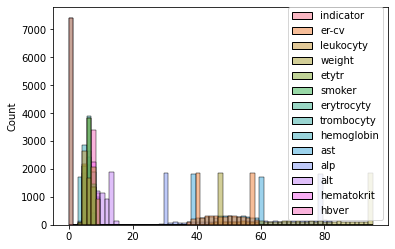

In [87]:
sns.histplot(labor_train.loc[:, atributes])

<AxesSubplot:ylabel='Count'>

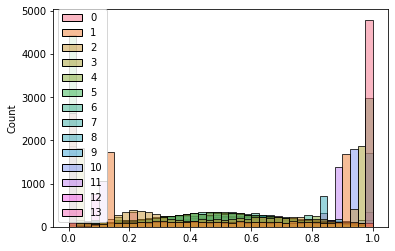

In [88]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(labor_train.loc[:, atributes])
sns.histplot(scaled)

<AxesSubplot:ylabel='Count'>

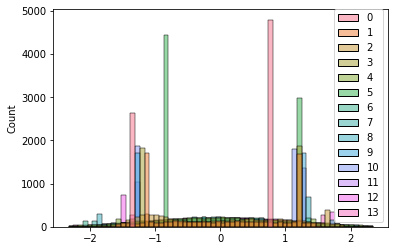

In [89]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(labor_train.loc[:, atributes])
sns.histplot(scaled)

<AxesSubplot:ylabel='Count'>

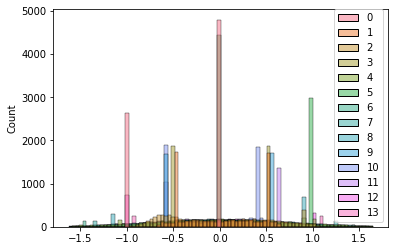

In [90]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaled = scaler.fit_transform(labor_train.loc[:, atributes])
sns.histplot(scaled)

<AxesSubplot:ylabel='Count'>

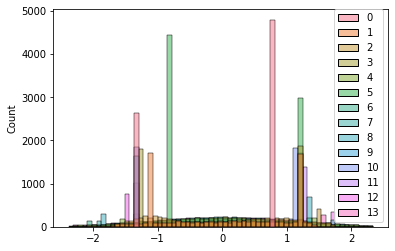

In [91]:
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method='yeo-johnson', standardize=True)
trans = power.fit_transform(labor_train.loc[:, atributes])
sns.histplot(trans)

<AxesSubplot:ylabel='Count'>

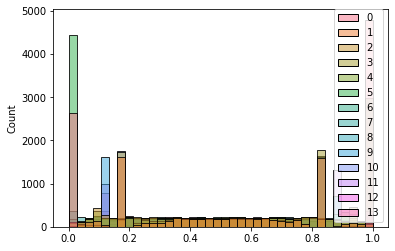

In [92]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(n_quantiles=10, random_state=0)
trans = qt.fit_transform(labor_train.loc[:, atributes])
sns.histplot(trans)

<AxesSubplot:ylabel='Count'>

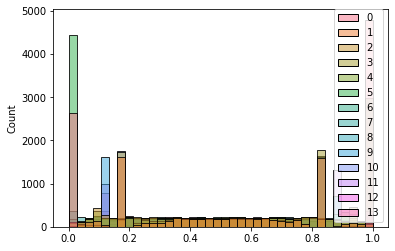

In [93]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(n_quantiles=10, random_state=0)
labor_train = my_fit(labor_train, qt, atributes)
sns.histplot(labor_train)

## Výber atribútov pre strojové učenie

Pre výber atribútov použijeme Mutual Information porovnanie a vyberieme k najlepších

In [94]:
k=7

In [95]:
labor_train =  pd.DataFrame(labor_train,columns = atributes)

In [96]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

y = labor_train['indicator']
labor_train_proc = SelectKBest(mutual_info_regression, k=k).fit_transform(labor_train, y)
labor_train_proc

array([[1.        , 0.16666667, 0.40149731, ..., 0.74275496, 0.11111111,
        0.32211312],
       [0.        , 0.40500026, 0.52578816, ..., 0.09639939, 0.46716698,
        0.76729068],
       [1.        , 0.16666667, 0.81234373, ..., 0.27896051, 0.11111111,
        0.21372064],
       ...,
       [1.        , 0.57078913, 0.51119142, ..., 0.47272738, 0.83333333,
        0.13075039],
       [1.        , 0.33683468, 0.58736578, ..., 0.70114918, 0.50185431,
        0.21417935],
       [1.        , 0.16666667, 0.26780283, ..., 0.30917871, 0.67142037,
        0.36112956]])

Potrebujeme zistiť ktoré atribúty funkcia vybrala

In [97]:
# Vráti array názvov stĺpcov
def get_names(w_names, wo_names):
    names = w_names.columns
    ret_val = []
    i = 0
    for x in wo_names[0]:
        j = 0
        for y in w_names.iloc[0]:
            if j<i:
                j+=1
                continue
            if x == y:
                ret_val.append(names[j])
                i = j
                break
            j+=1
    return (ret_val)
   

Môžme vytvoriť nový dataframe so správnym pomenovaním a hodnotami

In [98]:
print(get_names(labor_train,labor_train_proc)[1:])

['er-cv', 'leukocyty', 'trombocyty', 'hemoglobin', 'ast', 'hematokrit']


In [99]:
labor_train_proc = pd.DataFrame(labor_train_proc,columns = get_names(labor_train,labor_train_proc))

In [100]:
labor_train_proc

,indicator,er-cv,leukocyty,trombocyty,hemoglobin,ast,hematokrit
0,1.0,0.166667,0.401497,0.551966,0.742755,0.111111,0.322113
1,0.0,0.405000,0.525788,0.850466,0.096399,0.467167,0.767291
2,1.0,0.166667,0.812344,0.127427,0.278961,0.111111,0.213721
3,0.0,0.698214,0.787698,0.455711,0.888889,0.422187,0.512109
4,0.0,0.408464,0.944378,0.369594,0.128604,0.111111,0.255717
...,...,...,...,...,...,...,...
7411,0.0,0.166667,0.078640,0.755602,0.278672,0.833333,0.980660
7412,1.0,0.833333,0.341716,0.792409,0.375579,0.833333,0.617682
7413,1.0,0.570789,0.511191,0.041743,0.472727,0.833333,0.130750
7414,1.0,0.336835,0.587366,0.141449,0.701149,0.501854,0.214179


Atribúty s ktorými budeme ďalej pracovať sú er-cv, leukocyty, trombocyty, hemoglobin, ast, hematokrit
Podľa dôležitosti ich vieme zoradiť úpravou výberu

In [101]:
from numpy import arange

def get_order():
    y = labor_train_proc['indicator']
    for x in arange(2, k+1, 1):
        new_arr = SelectKBest(mutual_info_regression, k=x).fit_transform(labor_train_proc, y)
        print(get_names(labor_train, new_arr)[1:])

In [102]:
get_order()

['leukocyty']
['leukocyty', 'hematokrit']
['leukocyty', 'hemoglobin', 'hematokrit']
['er-cv', 'leukocyty', 'hemoglobin', 'hematokrit']
['leukocyty', 'trombocyty', 'hemoglobin', 'ast', 'hematokrit']
['er-cv', 'leukocyty', 'trombocyty', 'hemoglobin', 'ast', 'hematokrit']


Vieme určiť, že atribúty v poradí od najdôležitejšieho sú
1. Leukocyty
2. Hematokrit
3. Hemoglobin
4. Er-cv
5. Trombocyty
6. Ast

## Predspracovanie testovacej množiny 
Vytvorenie funkcie na predspracovanie podľa predspracovania trénovacej množiny

In [103]:
def preprocessing(datafr):
    retframe = datafr[labor_train_proc.columns]
    retframe = retframe.reset_index(drop=True)
    retframe = my_fit(retframe, qt, labor_train_proc.columns)
    retframe = pd.DataFrame(retframe, columns =  labor_train_proc.columns)
    return retframe

Použitie funkcie na testovaciu množinu

In [104]:
labor_test_proc = preprocessing(labor_test)

In [105]:
labor_test_proc

,indicator,er-cv,leukocyty,trombocyty,hemoglobin,ast,hematokrit
0,1.0,0.665906,0.100535,0.670131,0.188402,0.774156,0.854971
1,1.0,0.431031,0.292957,0.505078,0.574594,0.519243,0.138992
2,0.0,0.833333,0.927602,0.804264,0.888889,0.888889,0.344746
3,0.0,0.166667,0.494079,0.837628,0.298132,0.111111,0.832973
4,0.0,0.326503,0.585516,0.378796,0.506597,0.460350,0.743430
...,...,...,...,...,...,...,...
2467,0.0,0.596222,0.650872,0.252858,0.504795,0.484935,0.560478
2468,0.0,0.166667,0.338466,0.468159,0.448032,0.247005,0.344596
2469,1.0,0.726931,0.265893,0.137857,0.404205,0.333889,0.602692
2470,0.0,0.166667,0.902223,0.515914,0.573236,0.463605,0.353606


In [106]:
labor_test_proc.to_csv('test_preprocessed.csv',sep='\t')

In [107]:
labor_train_proc.to_csv('train_preprocessed.csv',sep='\t')